In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('result.csv')

In [3]:
target = df[df.columns[-1]].values
data = df[df.columns[:-1]].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 123)

In [5]:
xgb_model = xgb.XGBRegressor(random_state = 42)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [6]:
y_pred = xgb_model.predict(X_test)
y_pred1 = xgb_model.predict(X_train)

print('RMSE:', mean_squared_error(y_test, y_pred, squared = False))
print('R2:', r2_score(y_test, y_pred))

RMSE: 24.868475200503557
R2: 0.05501274602459372


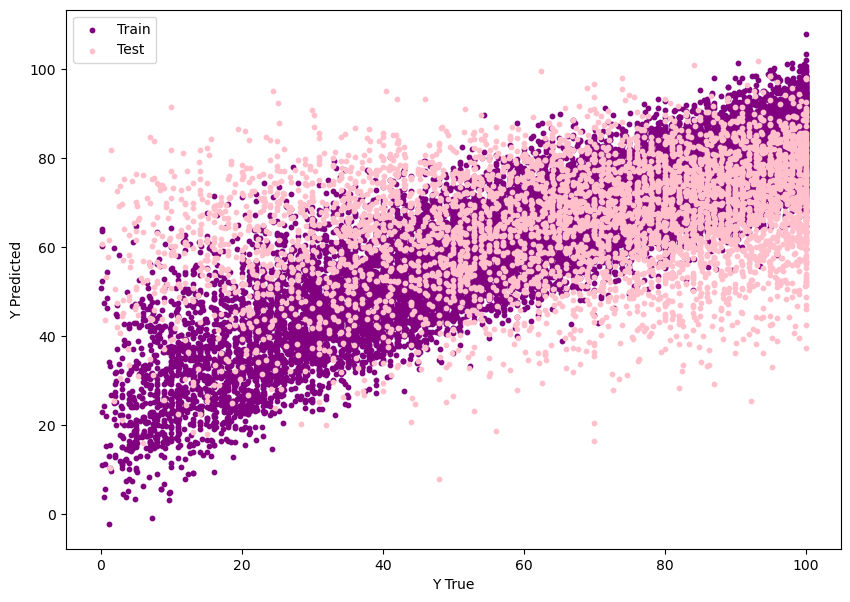

In [7]:
fig = plt.figure(figsize=(10, 7))

legend = ['Train', 'Test']

plt.scatter(y_train, y_pred1, c = 'purple', s = 10)
plt.scatter(y_test, y_pred, c = 'pink', s = 10)
plt.legend(legend, loc = 'best')
plt.xlabel("Y True")
plt.ylabel("Y Predicted");